In [1]:
# Importing Packages

import numpy as np
import matplotlib.pyplot as plt
import time

from typing import Optional, Union

import jax
import jax.numpy as jnp
from jax.scipy.special import erf
from jax import jit, vmap, block_until_ready, config

from rl_algos.ppo_fft_cnn import PPO_make_train

In [2]:
# Seeding everything

seed = 30

rng = jax.random.PRNGKey(seed)
rng, _rng = jax.random.split(rng)

In [3]:
# Defining Cairo Params and RL Params

tau_0 = 0.398
kappa = 20.0
chi = 0.65 * 2. * jnp.pi
kerr = 0.002
gamma = 1/140
time_coeff = 10.0
snr_coeff = 10.0
smoothness_coeff = 0.0
smoothness_baseline_scale = 1.0
apply_smoothing = False
bandwidth = 50.0
freq_relative_cutoff = 0.1
bandwidth_coeff = 25.0
apply_bandwidth_constraint = True
n0 = 43
res_amp_scaling = 1/0.43
actual_max_photons = n0 * (1 - jnp.exp(-0.5 * kappa * tau_0))**2
print(f"Rough Max Photons: {n0}")
print(f"Actual Max Photons: {actual_max_photons}")
nR = 0.01
snr_scale_factor = 1.9
gamma_I = 1/140
num_t1 = 5.0
photon_gamma = 1/1500
init_fid = 1 - 1e-4
photon_weight = 4.0

env_config = {"kappa": kappa,
    "chi": chi,
    "kerr": kerr,
    "time_coeff": time_coeff,
    "snr_coeff": snr_coeff,
    "smoothness_coeff": smoothness_coeff,
    "smoothness_baseline_scale": smoothness_baseline_scale,
    "apply_smoothing": apply_smoothing,
    "bandwidth": bandwidth,
    "freq_relative_cutoff": freq_relative_cutoff,
    "bandwidth_coeff": bandwidth_coeff,
    "apply_bandwidth_constraint": apply_bandwidth_constraint,
    "n0": n0,
    "tau_0": tau_0,
    "res_amp_scaling": res_amp_scaling,
    "nR": nR,
    "snr_scale_factor": snr_scale_factor,
    "gamma_I": gamma_I,
    "photon_gamma": photon_gamma,
    "num_t1": num_t1,
    "init_fid": init_fid,
    "photon_weight": photon_weight
}

num_envs = 256
num_updates = 8000
config = {
    "LR": 3e-3,
    "NUM_ENVS": num_envs,
    "NUM_STEPS": 1,
    "NUM_UPDATES": num_updates,
    "UPDATE_EPOCHS": 4,
    "NUM_MINIBATCHES": int(num_envs / 64),
    "CLIP_EPS": 0.2,
    "VALUE_CLIP_EPS": 0.2,
    "ENT_COEF": 0.0,
    "VF_COEF": 0.5,
    "MAX_GRAD_NORM": 0.5,
    "ACTIVATION": "tanh",
    "LAYER_SIZE": 64,
    # "KERNEL_SIZE": 15,
    "ENV_NAME": "single_langevin_env",
    "ENV_PARAMS": env_config,
    "ANNEAL_LR": True,
    "DEBUG": True,
    "DEBUG_ACTION": False,
    "PRINT_RATE": 100,
    "ACTION_PRINT_RATE": 100,
}

Rough Max Photons: 43
Actual Max Photons: 41.40804860100575


In [4]:
single_train = jit(PPO_make_train(config), static_argnums=-1)

print(f"Starting a Run of {num_updates} Updates")
start = time.time()
single_result = single_train(
    _rng, 
    num_envs)
end = time.time()
print(f"time taken: {end - start}")

Starting a Run of 8000 Updates
global update: 100
reward: -51.66892099616829
max pF: 2.565020433473097
max photon: 40.4846610724926
photon time: 0.36553460604559307
smoothness: 0.10763753728336437
bandwidth: 103.31095041322314
global update: 200
reward: -10.381647296400489
max pF: 2.5513435085140266
max photon: 36.60461650788784
photon time: 0.24041078808956273
smoothness: 0.07544942981837983
bandwidth: 80.74896694214877
global update: 300
reward: -4.326846738923218
max pF: 2.5467189884928194
max photon: 38.48545043170452
photon time: 0.23960811453261452
smoothness: 0.09781619122251659
bandwidth: 80.28409090909092
global update: 400
reward: -0.5768159088766074
max pF: 2.5476182625751553
max photon: 38.229913115501404
photon time: 0.23879653013574248
smoothness: 0.12077370150447148
bandwidth: 79.33884297520662
global update: 500
reward: 0.34849974582773746
max pF: 2.5573638390585214
max photon: 40.89199276268482
photon time: 0.23611842362683877
smoothness: 0.12830631437366996
bandwidth:

In [5]:
from utils import photon_env_dicts

env = photon_env_dicts()[config["ENV_NAME"]](**config["ENV_PARAMS"])

In [6]:
# Extracting Results

metrics = single_result["metrics"]

rewards = metrics["reward"]
max_pFs = metrics["max pF"]
max_photons = metrics["max photon"]
photon_times = metrics["photon time"]
smoothnesses = metrics["smoothness"]
bandwidths = metrics["bandwidth"]
actions = metrics["action"]

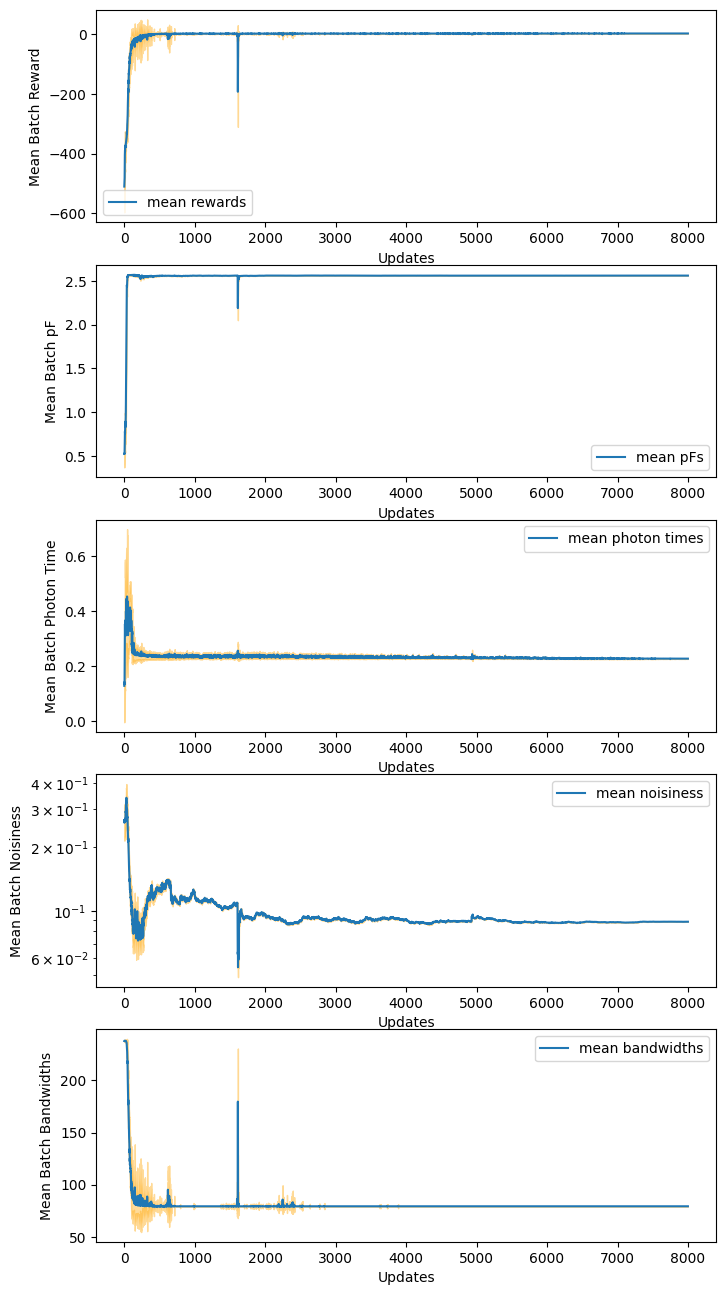

In [7]:
from utils import plot_learning

plot_learning(
    rewards=rewards,
    max_pFs=max_pFs,
    photon_times=photon_times,
    smoothnesses=smoothnesses,
    bandwidths=bandwidths,
)

[0.22708333 0.22810295 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22844494
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22749167
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22773217 0.22708333 0.22708333
 0.22708333 0.22708333 0.22708333 0.22708333 0.22708333 0.2270

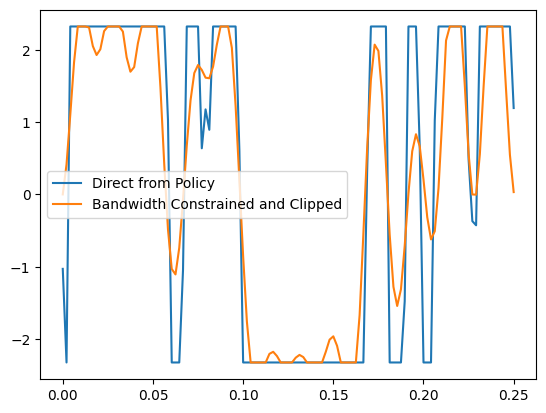

In [8]:
raw_final_action = -jnp.mean(actions, axis=1)[-1]
raw_final_action = -actions[-1, 0]
raw_transformed_action = env.prepare_action(raw_final_action)
env.kernel = env.default_params.gauss_kernel
smooth_final_action = env.drive_smoother(raw_transformed_action)

print(photon_times[-1])

plt.plot(env.ts_action, raw_final_action, label='Direct from Policy')
plt.plot(env.ts_action, raw_transformed_action / env.a0, label='Bandwidth Constrained and Clipped')
# plt.plot(env.ts_action, smooth_final_action, label='Smoothed')
plt.legend()
plt.show()

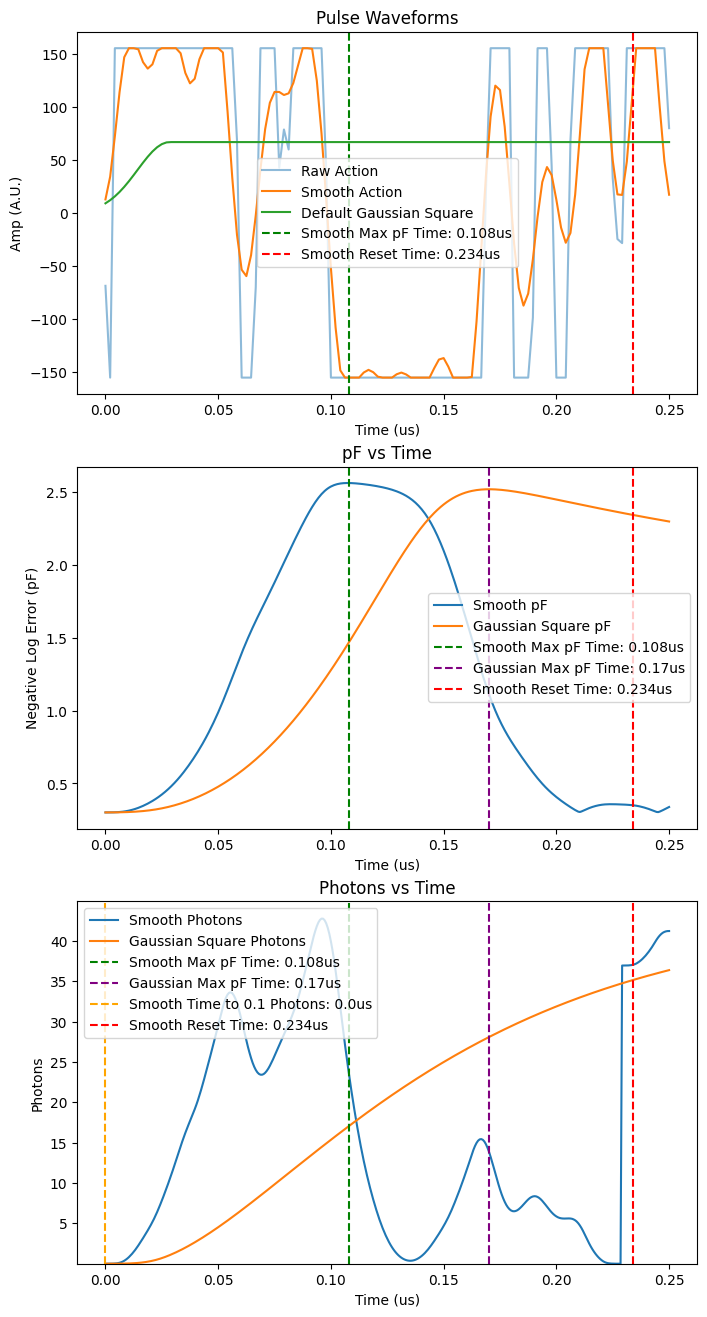

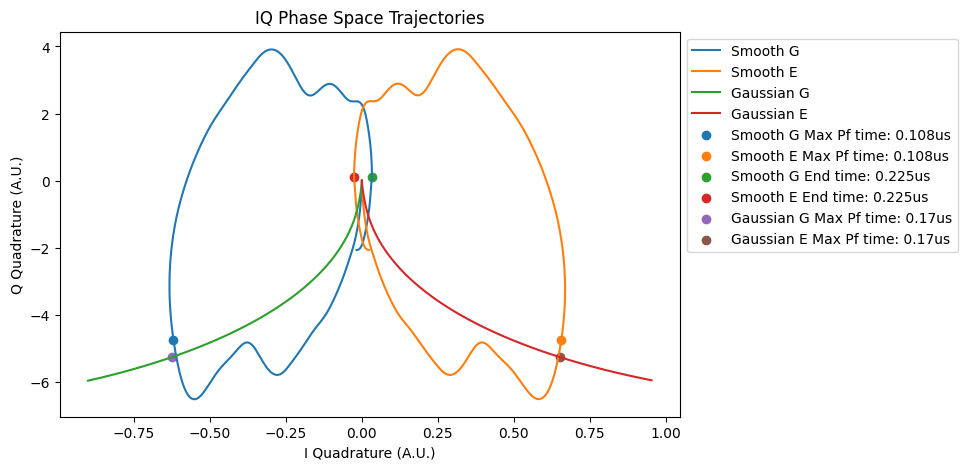

In [9]:
env.rollout_action(raw_final_action)